In [ ]:
import seaborn as sns
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [15, 10]})
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
filepath = "/content/drive/MyDrive/College/4th/spring/cis4321/Final Project/weatherAUS.csv"
rain_df = pd.read_csv(filepath)
rain_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
rain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

After checking some common information on the dataset and making sure it has successfully been put into a Pandas data frame, I will check to see any null values in the data set. 

In [ ]:
rain_df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

I will now drop all rows with observations that are null.

In [ ]:
rain_df.dropna(inplace = True)

rain_df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

After dropping rows with null observations, we still have over 50,000 observations to work with in the dataset. 

In [ ]:
rain_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56420 entries, 6049 to 142302
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           56420 non-null  object 
 1   Location       56420 non-null  object 
 2   MinTemp        56420 non-null  float64
 3   MaxTemp        56420 non-null  float64
 4   Rainfall       56420 non-null  float64
 5   Evaporation    56420 non-null  float64
 6   Sunshine       56420 non-null  float64
 7   WindGustDir    56420 non-null  object 
 8   WindGustSpeed  56420 non-null  float64
 9   WindDir9am     56420 non-null  object 
 10  WindDir3pm     56420 non-null  object 
 11  WindSpeed9am   56420 non-null  float64
 12  WindSpeed3pm   56420 non-null  float64
 13  Humidity9am    56420 non-null  float64
 14  Humidity3pm    56420 non-null  float64
 15  Pressure9am    56420 non-null  float64
 16  Pressure3pm    56420 non-null  float64
 17  Cloud9am       56420 non-null  float64
 18  Cl

In [ ]:
rain_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No
6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No
6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No
6053,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No
6054,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,WNW,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No


I will now split the data into a feature matrix (X) and a target variable (y). I will also drop several columns that we will not use.

In [ ]:
X = rain_df.drop(columns = ["RainTomorrow", "Date", "WindGustDir", "WindDir9am", "WindDir3pm", "RainToday"])
y = rain_df["RainTomorrow"]

Since the columns "Location" and "RainTomorrow" are strings, we need to convert these columns to numerical values using and LabelEncoder. After, we may normalize the data using StandardScaler from SKLearn and partition the data into training and testing sets.

In [ ]:
from sklearn.preprocessing import LabelEncoder
rain_le = LabelEncoder()
rain_df["Location"] = rain_le.fit_transform(rain_df["Location"].values)
rain_df["RainTomorrow"] = rain_le.fit_transform(rain_df["RainTomorrow"].values)

In [ ]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Now that we've normalized the predictor variables, we will use GridSearch to optimize 3 models.

In [ ]:
from sklearn.model_selection import GridSearchCV

Decision Tree (DT)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()

parameter_space_dt = {
    'min_samples_leaf' : range(2,50,2),
    'max_depth': range(1,30,2),
    'criterion'  :  ['gini', 'entropy']
}

dt = GridSearchCV(dt_model, parameter_space_dt, cv = 5)
dt.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [ ]:
dt.best_params_

{'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 48}

In [ ]:
dt.best_score_

0.8462044408402344

Logistic Regression (LR)

In [ ]:
from sklearn.linear_model import LogisticRegression 
lr_model = LogisticRegression()

parameter_space_lr = {
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 25, 50, 100, 150, 250, 500, 1000]
}

lr = GridSearchCV(lr_model, parameter_space_lr, cv = 5)
lr.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 25, 50, 100,
                               150, 250, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
lr.best_params_

{'C': 10}

In [ ]:
lr.best_score_

0.8531676104155043

Neural Networks (NN)

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp_gs = MLPClassifier()

parameter_space_nn = {
    'hidden_layer_sizes': [(10,30,10),(20,50,20)],
    'activation': ['tanh', 'relu', 'logistic'],
    'alpha': [0.0001, 0.001, 0.05]
}

nn = GridSearchCV(mlp_gs, parameter_space_nn, cv = 5)
nn.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=None, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=

In [ ]:
nn.best_params_

{'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (10, 30, 10)}

In [ ]:
nn.best_score_

0.8603332282782205

Now I will create a classification report for each model that display percision, accuracy, recall, and AUC.

In [ ]:
from sklearn.metrics import classification_report

Decision Tree (DT)

In [ ]:
y_pred_dt = dt.predict(X_test)
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     13158
           1       0.74      0.50      0.59      3768

    accuracy                           0.85     16926
   macro avg       0.80      0.72      0.75     16926
weighted avg       0.84      0.85      0.84     16926



Logistic Regression (LR)

In [ ]:
y_pred_lr = lr.predict(X_test)
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91     13158
           1       0.74      0.55      0.63      3768

    accuracy                           0.86     16926
   macro avg       0.81      0.75      0.77     16926
weighted avg       0.85      0.86      0.85     16926



Neural Networks (NN)

In [ ]:
y_pred_nn = nn.predict(X_test)
print(classification_report(y_test, y_pred_nn))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91     13158
           1       0.73      0.57      0.64      3768

    accuracy                           0.86     16926
   macro avg       0.81      0.76      0.78     16926
weighted avg       0.85      0.86      0.85     16926



Next, I will use a function to help with visualizing the accuracy for each model.

In [ ]:
def classification_model_evaluation(X,y,score):
    # scoring optioon: accuracy, f1_macro, precision_macro, recall_macro
    from sklearn.preprocessing import LabelBinarizer
    from sklearn.metrics import roc_curve,roc_auc_score,auc

    
    # import models
    import pandas
    import matplotlib.pyplot as plt
    from sklearn import model_selection
    from sklearn.linear_model import LogisticRegression
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    from sklearn.naive_bayes import GaussianNB
    from sklearn.svm import SVC
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.3, random_state=10, stratify =y)

    # load models
    seed = 1
    models = []
    models.append(('LR', LogisticRegression(C=100)))
    models.append(('KNN', KNeighborsClassifier(5)))
    models.append(('DT', DecisionTreeClassifier()))
    #models.append(('NB', GaussianNB()))
    #models.append(('SVM', SVC()))
    #models.append(('LDA', LinearDiscriminantAnalysis()))
    models.append(('RF',RandomForestClassifier()))
    
    results = []
    names = []
    models_summary = {}
    scoring = score
    # Define a result table as a DataFrame
    result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
    for name, model in models:
        kfold = model_selection.KFold(n_splits=10, random_state=seed)
        cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        #print("%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()))
        models_summary[name] = ([cv_results.mean(),cv_results.std()])
        

        cls = model.fit(X_train,y_train)
        yproba = cls.predict_proba(X_test)[::,1]
        fpr, tpr, _ = roc_curve(y_test,  yproba)
        auc = roc_auc_score(y_test, yproba)
    
        result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                            'fpr':fpr, 
                                            'tpr':tpr, 
                                            'auc':auc}, ignore_index=True)
    
    models_summary_df = pd.DataFrame(models_summary,index=[str(score) + '_mean', str(score) + '_stdev'])

    #  model comparison boxplot
    fig = plt.figure(figsize=(10,6))
    fig.suptitle('Model Comparison \n Scoring: %s' %scoring)
    ax = fig.add_subplot(111)
    boxplot_results = pd.DataFrame(results, index=names)
    boxplot_results.assign(m=boxplot_results.mean(axis=1)).sort_values('m').drop('m', axis=1)
    
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.grid()
    plt.show()
    #print(results)
    

    # Set name of the classifiers as index labels
    result_table.set_index('classifiers', inplace=True)

    fig = plt.figure(figsize=(10,6))

    for i in result_table.index:
        plt.plot(result_table.loc[i]['fpr'], 
                 result_table.loc[i]['tpr'], 
                 label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))

    plt.plot([0,1], [0,1], color='orange', linestyle='--')

    plt.xticks(np.arange(0.0, 1.1, step=0.1))
    plt.xlabel("Flase Positive Rate", fontsize=15)

    plt.yticks(np.arange(0.0, 1.1, step=0.1))
    plt.ylabel("True Positive Rate", fontsize=15)

    plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
    plt.legend(prop={'size':13}, loc='lower right')
    plt.grid()
    plt.show()
    
    display(models_summary_df.head(2))

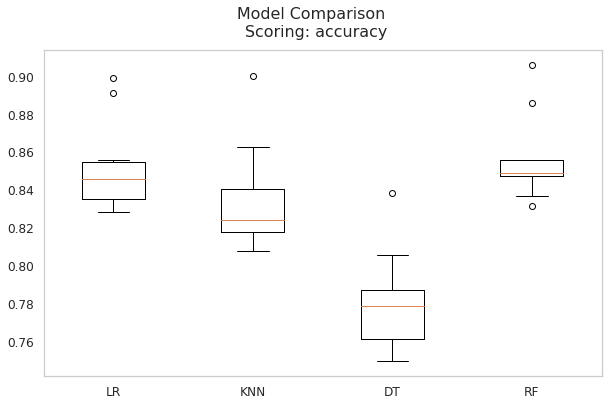

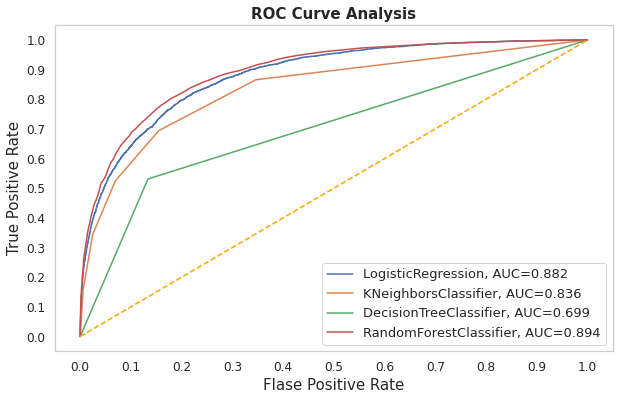

,LR,KNN,DT,RF
accuracy_mean,0.852216,0.834544,0.780769,0.856611
accuracy_stdev,0.023157,0.026546,0.025361,0.021432


In [ ]:
classification_model_evaluation(X, y, "accuracy")